<span style = "font-family:Geogia; color:orange;  font-style:italic; font-size:14px">
Basics of tensor use in torch Library <br>
Creating and playing with tensors in pytorch<br>
</span>

In [1]:
import numpy as np
import jax.numpy as jnp
import torch
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import glob
from Curve_fitting_with_scipy import Gaussianfitting as Gf
from Curve_fitting_with_scipy import Linefitting as Lf
from scipy.signal import fftconvolve
from collections import defaultdict
import PIL
import joblib


import matplotlib as mpl

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.weight'] = 'bold'
#mpl.rcParams['font.style'] = 'italic'  # Set this to 'italic'
mpl.rcParams['figure.dpi'] = 120  # highres display

In [9]:
tensor = torch.tensor(np.random.randint(low=-10,high=10,size=(2,3,3)))  # basic tensor in torch
tensor

tensor([[[ 2, -2,  8],
         [-2,  4, -3],
         [-8,  8,  5]],

        [[-6,  7,  2],
         [ 9,  4,  3],
         [ 3, -9, -9]]], dtype=torch.int32)

In [10]:
tensor = torch.eye(5) # 5 th order identity martrix
tensor

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

In [15]:
tensor = torch.randint(low=0-10, high=10, size=(3, 3)) # random integer array with torch
tensor = np.array(tensor)
tensor

array([[ -3,   5,   2],
       [-10,  -9,   6],
       [ -9,  -4,  -4]], dtype=int64)

(array([ 8., 10., 13.,  8.,  6.,  8., 13.,  8., 11., 14., 14., 13.,  9.,
        10.,  7., 10., 10., 11.,  9.,  8.]),
 array([-0.98339462, -0.88439012, -0.78538567, -0.68638116, -0.58737671,
        -0.48837221, -0.38936773, -0.29036325, -0.19135876, -0.09235428,
         0.00665021,  0.10565469,  0.20465918,  0.30366367,  0.40266815,
         0.50167263,  0.60067713,  0.69968158,  0.79868609,  0.89769053,
         0.99669504]),
 <BarContainer object of 20 artists>)

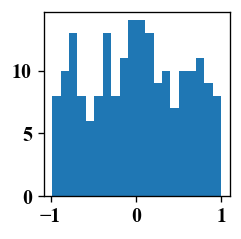

In [30]:
tensor = 2*torch.rand((200))-1
plt.figure(figsize=(2,2))
plt.hist(tensor,bins=20)

In [35]:
tensor = torch.tensor(np.random.randint(low=-10,high=10,size=(3)))  # basic tensor in torch
print(tensor)
print(tensor**2)

tensor([ 8, -3, -7], dtype=torch.int32)
tensor([64,  9, 49], dtype=torch.int32)


In [36]:
tensor1 = torch.tensor([1,2,3])
tensor2 = torch.tensor([4,5,6])  # element wise multiplication of tensors
print(tensor1*tensor2)

tensor([ 4, 10, 18])


### dot product of tensor

In [41]:
a = torch.tensor(np.random.randint(low=-10,high=10,size=(3,3)))  # basic tensor in torch
b = torch.tensor(np.random.randint(low=-10,high=10,size=(3,3)))  # basic tensor in torch

# Matrix multiplication using einsum
matrix_product = torch.einsum('ik,kj->ij', a, b)

print(matrix_product)
print(a@b)

tensor([[ -2,  68,  14],
        [-22, -32,  19],
        [-22, -28, -60]], dtype=torch.int32)
tensor([[ -2,  68,  14],
        [-22, -32,  19],
        [-22, -28, -60]], dtype=torch.int32)


In [52]:
# Define two rank-3 tensors
A = torch.randn(2, 3, 4)  # Tensor A of shape (2, 3, 4)
B = torch.randn(4, 5, 6)  # Tensor B of shape (4, 5, 6)

# Perform tensor contraction on the shared dimension (k=4)
# "ijk,klm -> ijlm" contracts over k, resulting in shape (2, 3, 5, 6)
result = torch.einsum('ijk,klm->ijlm', A, B)

# Print the resulting tensor shape
print(result.shape)

torch.Size([2, 3, 5, 6])


## tensor product of required dimension

In [66]:
# Define two rank-3 tensors
A = torch.randn(2, 4)  # Tensor A of shape (2, 3, 4)
B = torch.randn(4, 5, 6)  # Tensor B of shape (4, 5, 6)

# Perform tensor contraction on the shared dimension (k=4)
# "ijk,klm -> ijlm" contracts over k, resulting in shape (2, 3, 5, 6)
result = torch.einsum('aj,jkl->akl', A, B)
# Print the resulting tensor shape
print(result.shape)

result = torch.einsum('aj,jkl->kal', A, B)
# Print the resulting tensor shape
print(result.shape)

result = torch.einsum('aj,jkl->kla', A, B)
# Print the resulting tensor shape
print(result.shape)
print(type(result))

torch.Size([2, 5, 6])
torch.Size([5, 2, 6])
torch.Size([5, 6, 2])
<class 'torch.Tensor'>


In [73]:
import torch.nn as nn
# Define the custom activation function
class CustomActivation(nn.Module):
    def __init__(self):
        super(CustomActivation, self).__init__()

    def forward(self, x):
        # Apply the piecewise activation function
        return torch.where(x < 0, torch.tensor(0.0, device=x.device), 
                           torch.where(x < 1, x, torch.tensor(1.0, device=x.device)))
    def forward1(self,x):
        # Apply the piecewise activation function
        return torch.where(x < 0, torch.tensor(0.0, device=x.device), 
                           torch.where(x < 1, x**2, torch.tensor(1.0, device=x.device)))

# Example usage of the custom activation function
activation = CustomActivation()

# Example tensor
x = torch.tensor([-1.5, 0.0, 0.5, 1.0, 1.5])

output = activation(x)
print(output)


tensor([0.0000, 0.0000, 0.5000, 1.0000, 1.0000])
